# Inizializzazione

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Biochemical = pd.read_csv("Excel/Biochemical_parameters.csv")
Diagnostics = pd.read_csv("Excel/Diagnostics.csv")
Glucose = pd.read_csv("Excel/Glucose_measurements.csv")
Patient = pd.read_csv("Excel/Patient_info.csv")

## Patient

In [2]:
Patient

,Patient_ID,Sex,Birth_year,Initial_measurement_date,Final_measurement_date,Number_of_days_with_measures,Number_of_measurements,Initial_biochemical_parameters_date,Final_biochemical_parameters_date,Number_of_biochemical_parameters,Number_of_diagnostics
0,LIB193263,M,1965,2020-06-09,2022-03-19,648,60097,NaN,NaN,NaN,1.0
1,LIB193264,F,1975,2020-06-10,2022-03-19,326,26786,NaN,NaN,NaN,3.0
2,LIB193265,F,1980,2019-01-27,2022-03-19,581,46575,2018-09-05,2021-10-01,120.0,NaN
3,LIB193266,M,1998,2020-10-08,2022-03-21,500,55307,2020-08-21,2022-02-22,74.0,2.0
4,LIB193267,F,1980,2020-06-09,2022-03-17,647,55500,2018-04-30,2022-01-24,177.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
731,LIB194162,M,1999,2021-03-23,2022-03-19,361,33439,2020-12-15,2020-12-15,12.0,NaN
732,LIB194163,M,1984,2021-09-09,2022-03-19,192,17754,2020-01-09,2022-01-31,64.0,NaN
733,LIB194164,F,1991,2020-06-25,2022-03-18,632,58349,2020-03-06,2022-01-12,158.0,1.0
734,LIB194165,F,1986,2021-05-12,2022-03-21,259,23862,2021-04-14,2022-03-02,22.0,NaN


Analisi delle caratteristiche e delle distribuzioni dei dati

In [ ]:
Patient.info()
Patient.describe()

In [ ]:
Patient.describe(include=['O'])

conto il numero di valori NaN

In [ ]:
nan_mask = Patient.isna()
nan_count = nan_mask.sum()

nan_count

## Diagnostics

In [3]:
Diagnostics

,Patient_ID,Code,Description
0,LIB193263,272.4,Other and unspecified hyperlipidemia
1,LIB193264,354.0,Carpal tunnel syndrome
2,LIB193264,574.00,Calculus of gallbladder with acute cholecystit...
3,LIB193264,719.41,"Pain in joint, shoulder region"
4,LIB193266,253.5,Diabetes insipidus
...,...,...,...
1752,LIB194161,272.4,Other and unspecified hyperlipidemia
1753,LIB194161,401.9,Unspecified essential hypertension
1754,LIB194161,435.9,Unspecified transient cerebral ischemia
1755,LIB194161,920,"Contusion of face, scalp, and neck except eye(s)"


In [ ]:
Diagnostics.info()
Diagnostics.describe()

In [ ]:
Diagnostics['Description'].value_counts()

In [ ]:
Number_Description = Diagnostics.groupby('Patient_ID')['Description'].count()
Number_Description

In [ ]:
Number_Description.describe()

## Biochemical_parameters

In [ ]:
Biochemical

In [ ]:
Biochemical.info()
Biochemical.describe()

In [ ]:
Biochemical.describe(include=['O'])

In [ ]:
nan_mask = Biochemical.isna()
nan_count = nan_mask.sum()

nan_count

In [ ]:
number = Biochemical.groupby(['Patient_ID', 'Name']).size().reset_index(name='Count')
number

In [ ]:
number.describe(include=['O'])

In [ ]:
number.groupby('Patient_ID')['Name'].count()

In [ ]:
number.groupby(['Name'])['Count'].sum()

#### Creatine

In [ ]:
creatinine_subset = Biochemical[(Biochemical['Name'] == 'Creatinine')].copy()
creatinine_subset.drop(['Name'], axis=1, inplace=True)
creatinine_subset.describe()

In [ ]:
creatinine_diagnostic = pd.merge(creatinine_subset, Diagnostics, on='Patient_ID').copy()
creatinine_diagnostic.drop(['Code'], axis=1, inplace=True)
creatinine_diagnostic

In [ ]:
for description in creatinine_diagnostic['Description'].unique():
    subset = creatinine_diagnostic[creatinine_diagnostic['Description'] == description]
    unique_patients = subset['Patient_ID'].nunique()
    
    if unique_patients >= 16:
        if 60 > unique_patients >= 30:
            plt.figure(figsize=(10, 5))
        elif unique_patients >= 60:
            plt.figure(figsize=(20,5))
        else:
            plt.figure()
        sns.scatterplot(x='Patient_ID', y='Value', data=subset)
        plt.title(f'Scatterplot per \"{description}\"')
        plt.xlabel('Patient_ID')
        plt.ylabel('Valore della Creatinina')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout() 
        plt.grid(True)
        plt.show()

#### Glucose

In [ ]:
glucose_subset = Biochemical[(Biochemical['Name'] == 'Glucose')].copy()
glucose_subset.drop(['Name'], axis=1, inplace=True)
glucose_subset.describe()

In [ ]:
glucose_diagnostic = pd.merge(glucose_subset, Diagnostics, on='Patient_ID').copy()
glucose_diagnostic.drop(['Code'], axis=1, inplace=True)
glucose_diagnostic

In [ ]:
for description in glucose_diagnostic['Description'].unique():
    subset = glucose_diagnostic[glucose_diagnostic['Description'] == description]
    unique_patients = subset['Patient_ID'].nunique()
    
    if unique_patients >= 16:
        if 60 > unique_patients >= 30:
            plt.figure(figsize=(10, 5))
        elif unique_patients >= 60:
            plt.figure(figsize=(20,5))
        else:
            plt.figure()
        sns.scatterplot(x='Patient_ID', y='Value', data=subset)
        plt.title(f'Scatterplot per \"{description}\"')
        plt.xlabel('Patient_ID')
        plt.ylabel('Valore del Glucosio')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout() 
        plt.show()

#### Potassium

In [ ]:
potassium_subset = Biochemical[(Biochemical['Name'] == 'Potassium')].copy()
potassium_subset.drop(['Name'], axis=1, inplace=True)
potassium_subset.describe()

In [ ]:
potassium_diagnostic = pd.merge(potassium_subset, Diagnostics, on='Patient_ID').copy()
potassium_diagnostic.drop(['Code'], axis=1, inplace=True)
potassium_diagnostic

In [ ]:
for description in potassium_diagnostic['Description'].unique():
    subset = potassium_diagnostic[potassium_diagnostic['Description'] == description]
    unique_patients = subset['Patient_ID'].nunique()
    
    if unique_patients >= 16:
        if 60 > unique_patients >= 30:
            plt.figure(figsize=(10, 5))
        elif unique_patients >= 60:
            plt.figure(figsize=(20,5))
        else:
            plt.figure()
        sns.scatterplot(x='Patient_ID', y='Value', data=subset)
        plt.title(f'Scatterplot per \"{description}\"')
        plt.xlabel('Patient_ID')
        plt.ylabel('Valore del Potassio')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout() 
        plt.show()

#### Sodium

In [ ]:
sodium_subset = Biochemical[(Biochemical['Name'] == 'Sodium')].copy()
sodium_subset.drop(['Name'], axis=1, inplace=True)
sodium_subset.describe()

In [ ]:
sodium_diagnostic = pd.merge(sodium_subset, Diagnostics, on='Patient_ID').copy()
sodium_diagnostic.drop(['Code'], axis=1, inplace=True)
sodium_diagnostic

In [ ]:
for description in sodium_diagnostic['Description'].unique():
    subset = sodium_diagnostic[sodium_diagnostic['Description'] == description]
    unique_patients = subset['Patient_ID'].nunique()
    
    if unique_patients >= 16:
        if 60 > unique_patients >= 30:
            plt.figure(figsize=(10, 5))
        elif unique_patients >= 60:
            plt.figure(figsize=(20,5))
        else:
            plt.figure()
        sns.scatterplot(x='Patient_ID', y='Value', data=subset)
        plt.title(f'Scatterplot per \"{description}\"')
        plt.xlabel('Patient_ID')
        plt.ylabel('Valore del Sodio')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout() 
        plt.show()

#### Alanine transaminase (GPT)

In [ ]:
GPT_subset = Biochemical[(Biochemical['Name'] == 'Alanine transaminase (GPT)')].copy()
GPT_subset.drop(['Name'], axis=1, inplace=True)
GPT_subset.describe()

In [ ]:
GPT_diagnostic = pd.merge(GPT_subset, Diagnostics, on='Patient_ID').copy()
GPT_diagnostic.drop(['Code'], axis=1, inplace=True)
GPT_diagnostic

In [ ]:
for description in GPT_diagnostic['Description'].unique():
    subset = GPT_diagnostic[GPT_diagnostic['Description'] == description]
    unique_patients = subset['Patient_ID'].nunique()
    
    if unique_patients >= 16:
        if 60 > unique_patients >= 30:
            plt.figure(figsize=(10, 5))
        elif unique_patients >= 60:
            plt.figure(figsize=(20,5))
        else:
            plt.figure()
        sns.scatterplot(x='Patient_ID', y='Value', data=subset)
        plt.title(f'Scatterplot per \"{description}\"')
        plt.xlabel('Patient_ID')
        plt.ylabel('Valore del Glutammato piruvato transaminasi (GPT)')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout() 
        plt.show()

#### Gamma-glutamyl Transferase (GGT)

In [ ]:
GGT_subset = Biochemical[(Biochemical['Name'] == 'Gamma-glutamyl Transferase (GGT)')].copy()
GGT_subset.drop(['Name'], axis=1, inplace=True)
GGT_subset.describe()

In [ ]:
GGT_diagnostic = pd.merge(GGT_subset, Diagnostics, on='Patient_ID').copy()
GGT_diagnostic.drop(['Code'], axis=1, inplace=True)
GGT_diagnostic

In [ ]:
for description in GGT_diagnostic['Description'].unique():
    subset = GGT_diagnostic[GGT_diagnostic['Description'] == description]
    unique_patients = subset['Patient_ID'].nunique()
    
    if unique_patients >= 16:
        if 60 > unique_patients >= 30:
            plt.figure(figsize=(10, 5))
        elif unique_patients >= 60:
            plt.figure(figsize=(20,5))
        else:
            plt.figure()
        sns.scatterplot(x='Patient_ID', y='Value', data=subset)
        plt.title(f'Scatterplot per \"{description}\"')
        plt.xlabel('Patient_ID')
        plt.ylabel('Valore del Gamma-Glutamil Transferasi (GGT)')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout() 
        plt.show()

#### Total cholesterol

In [ ]:
cholesterol_subset = Biochemical[(Biochemical['Name'] == 'Total cholesterol')].copy()
cholesterol_subset.drop(['Name'], axis=1, inplace=True)
cholesterol_subset.describe()

In [ ]:
cholesterol_diagnostic = pd.merge(cholesterol_subset, Diagnostics, on='Patient_ID').copy()
cholesterol_diagnostic.drop(['Code'], axis=1, inplace=True)
cholesterol_diagnostic

In [ ]:
for description in cholesterol_diagnostic['Description'].unique():
    subset = cholesterol_diagnostic[cholesterol_diagnostic['Description'] == description]
    unique_patients = subset['Patient_ID'].nunique()
    
    if unique_patients >= 16:
        if 60 > unique_patients >= 30:
            plt.figure(figsize=(10, 5))
        elif unique_patients >= 60:
            plt.figure(figsize=(20,5))
        else:
            plt.figure()
        sns.scatterplot(x='Patient_ID', y='Value', data=subset)
        plt.title(f'Scatterplot per \"{description}\"')
        plt.xlabel('Patient_ID')
        plt.ylabel('Valore del Colesterolo Totale')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout() 
        plt.show()

#### Triglycerides

In [ ]:
triglycerides_subset = Biochemical[(Biochemical['Name'] == 'Triglycerides')].copy()
triglycerides_subset.drop(['Name'], axis=1, inplace=True)
triglycerides_subset.describe()

In [ ]:
triglycerides_diagnostic = pd.merge(triglycerides_subset, Diagnostics, on='Patient_ID').copy()
triglycerides_diagnostic.drop(['Code'], axis=1, inplace=True)
triglycerides_diagnostic

In [ ]:
for description in triglycerides_diagnostic['Description'].unique():
    subset = triglycerides_diagnostic[triglycerides_diagnostic['Description'] == description]
    unique_patients = subset['Patient_ID'].nunique()
    
    if unique_patients >= 16:
        if 60 > unique_patients >= 30:
            plt.figure(figsize=(10, 5))
        elif unique_patients >= 60:
            plt.figure(figsize=(20,5))
        else:
            plt.figure()
        sns.scatterplot(x='Patient_ID', y='Value', data=subset)
        plt.title(f'Scatterplot per \"{description}\"')
        plt.xlabel('Patient_ID')
        plt.ylabel('Valore dei Trigliceridi')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout() 
        plt.show()

#### HDL cholesterol

In [ ]:
HDL_subset = Biochemical[(Biochemical['Name'] == 'HDL cholesterol')].copy()
HDL_subset.drop(['Name'], axis=1, inplace=True)
HDL_subset.describe()

In [ ]:
HDL_diagnostic = pd.merge(HDL_subset, Diagnostics, on='Patient_ID').copy()
HDL_diagnostic.drop(['Code'], axis=1, inplace=True)
HDL_diagnostic

In [ ]:
for description in HDL_diagnostic['Description'].unique():
    subset = HDL_diagnostic[HDL_diagnostic['Description'] == description]
    unique_patients = subset['Patient_ID'].nunique()
    
    if unique_patients >= 16:
        if 60 > unique_patients >= 30:
            plt.figure(figsize=(10, 5))
        elif unique_patients >= 60:
            plt.figure(figsize=(20,5))
        else:
            plt.figure()
        sns.scatterplot(x='Patient_ID', y='Value', data=subset)
        plt.title(f'Scatterplot per \"{description}\"')
        plt.xlabel('Patient_ID')
        plt.ylabel('Valore del Colesterolo HDL')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout() 
        plt.show()

#### Uric acid

In [ ]:
uric_subset = Biochemical[(Biochemical['Name'] == 'Uric acid')].copy()
uric_subset.drop(['Name'], axis=1, inplace=True)
uric_subset.describe()

In [ ]:
uric_diagnostic = pd.merge(uric_subset, Diagnostics, on='Patient_ID').copy()
uric_diagnostic.drop(['Code'], axis=1, inplace=True)
uric_diagnostic

In [ ]:
for description in uric_diagnostic['Description'].unique():
    subset = uric_diagnostic[uric_diagnostic['Description'] == description]
    unique_patients = subset['Patient_ID'].nunique()
    
    if unique_patients >= 16:
        if 60 > unique_patients >= 30:
            plt.figure(figsize=(10, 5))
        elif unique_patients >= 60:
            plt.figure(figsize=(20,5))
        else:
            plt.figure()
        sns.scatterplot(x='Patient_ID', y='Value', data=subset)
        plt.title(f'Scatterplot per \"{description}\"')
        plt.xlabel('Patient_ID')
        plt.ylabel('Valore dell\'Acido Urico')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout() 
        plt.show()

#### Glycated hemoglobin (A1c)

In [ ]:
A1c_subset = Biochemical[(Biochemical['Name'] == 'Glycated hemoglobin (A1c)')].copy()
A1c_subset.drop(['Name'], axis=1, inplace=True)
A1c_subset.describe()

In [ ]:
A1c_diagnostic = pd.merge(A1c_subset, Diagnostics, on='Patient_ID').copy()
A1c_diagnostic.drop(['Code'], axis=1, inplace=True)
A1c_diagnostic

In [ ]:
for description in A1c_diagnostic['Description'].unique():
    subset = A1c_diagnostic[A1c_diagnostic['Description'] == description]
    unique_patients = subset['Patient_ID'].nunique()

    if unique_patients >= 16:
        if 60 > unique_patients >= 30:
            plt.figure(figsize=(10, 5))
        elif unique_patients >= 60:
            plt.figure(figsize=(20, 5))
        else:
            plt.figure()
        sns.scatterplot(x='Patient_ID', y='Value', data=subset)
        plt.title(f'Scatterplot per \"{description}\"')
        plt.xlabel('Patient_ID')
        plt.ylabel('Valore dell\'Emoglobina Glicata')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

#### Thyrotropin (TSH)

In [3]:
TSH_subset = Biochemical[(Biochemical['Name'] == 'Thyrotropin (TSH)')].copy()
TSH_subset.drop(['Name'], axis=1, inplace=True)
TSH_subset.describe()

,Value
count,4570.000000
mean,2.866165
std,4.679146
min,0.006000
25%,1.475250
50%,2.217500
75%,3.317750
max,204.890000


In [4]:
TSH_diagnostic = pd.merge(TSH_subset, Diagnostics, on='Patient_ID').copy()
TSH_diagnostic.drop(['Code'], axis=1, inplace=True)
TSH_diagnostic

,Patient_ID,Reception_date,Value,Description
0,LIB193266,2020-08-24,1.678,Diabetes insipidus
1,LIB193266,2020-08-24,1.678,Other chronic allergic conjunctivitis
2,LIB193266,2021-04-05,1.590,Diabetes insipidus
3,LIB193266,2021-04-05,1.590,Other chronic allergic conjunctivitis
4,LIB193266,2021-11-05,1.329,Diabetes insipidus
...,...,...,...,...
12749,LIB194164,2021-02-24,1.363,"Unspecified abortion, without mention of compl..."
12750,LIB194164,2021-04-14,1.963,"Unspecified abortion, without mention of compl..."
12751,LIB194164,2021-09-20,2.691,"Unspecified abortion, without mention of compl..."
12752,LIB194164,2021-11-19,1.741,"Unspecified abortion, without mention of compl..."


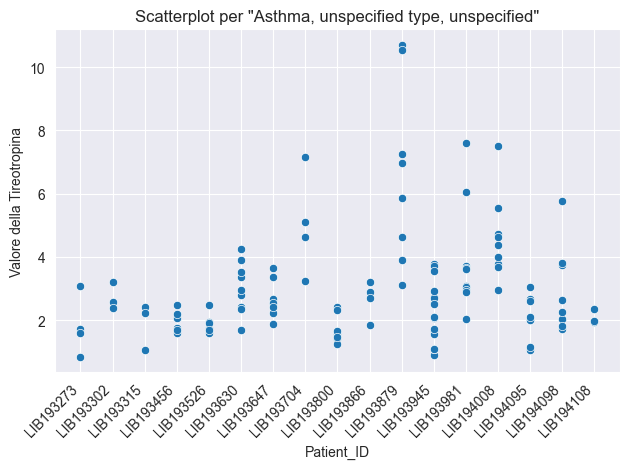

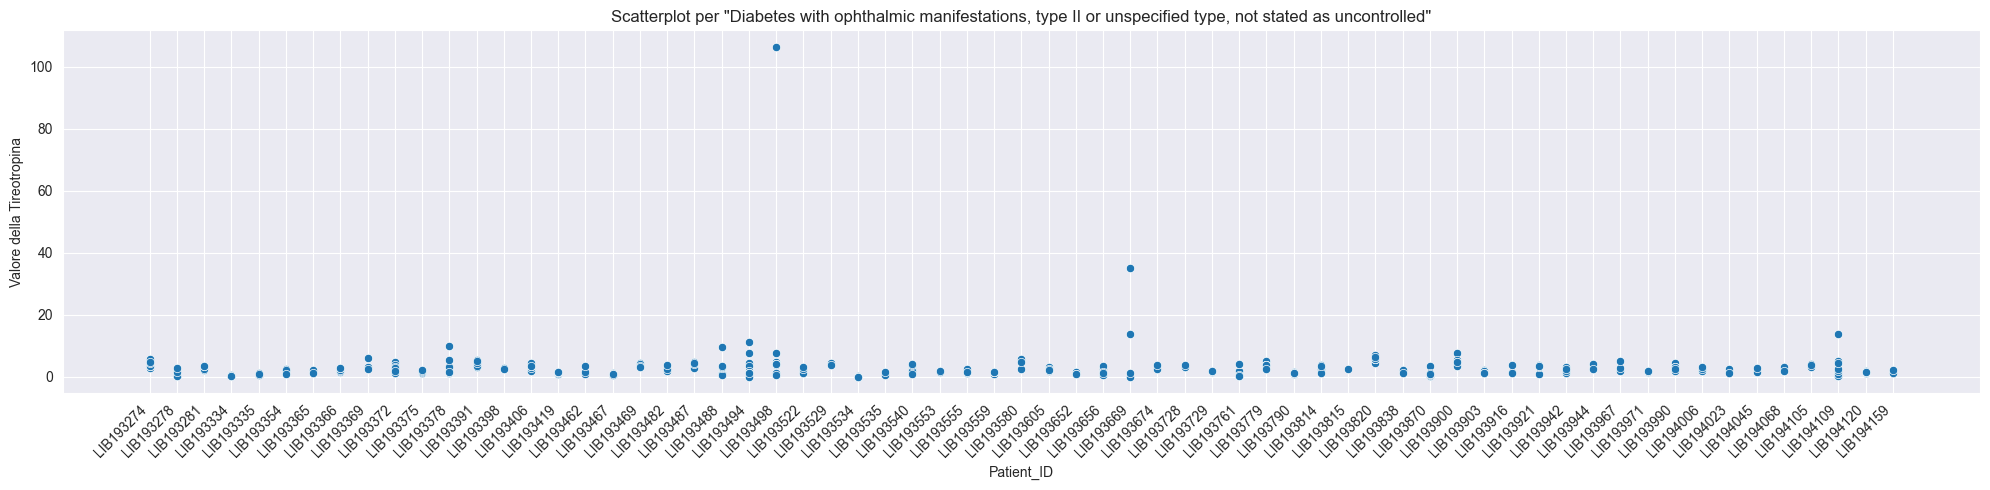

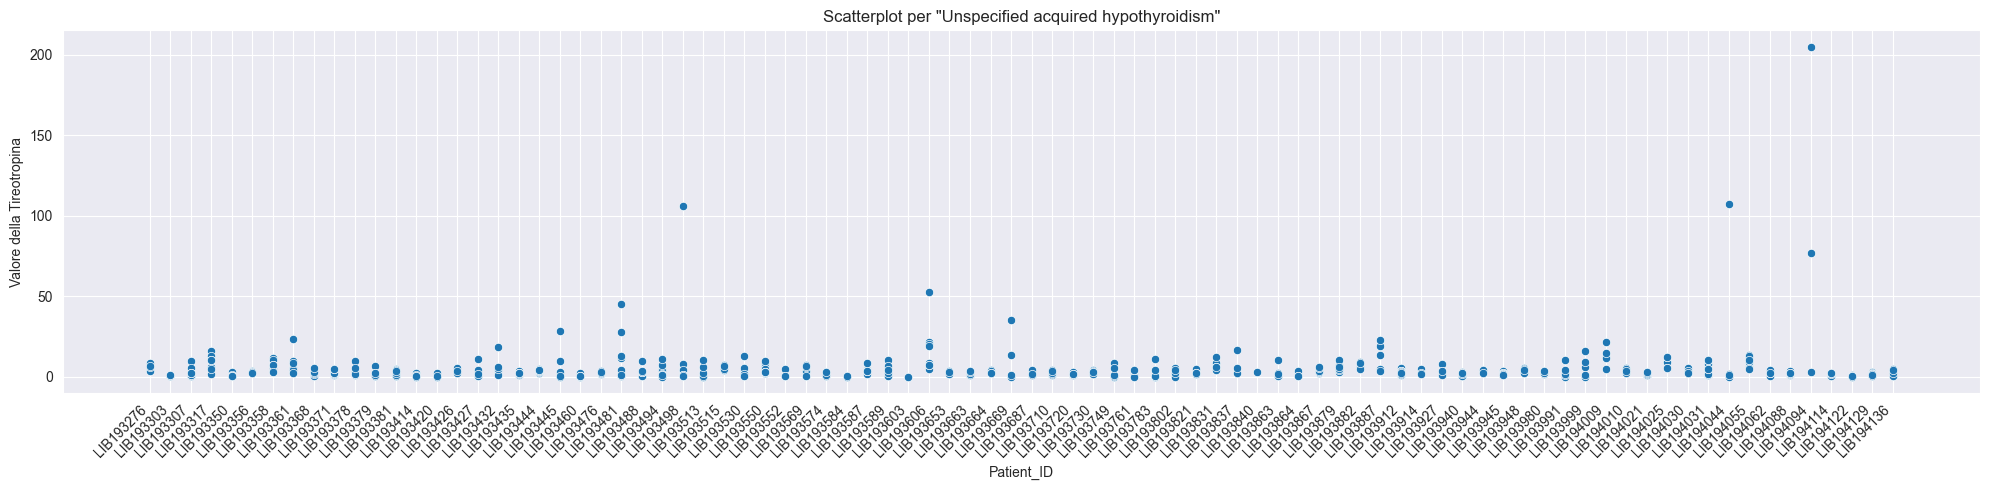

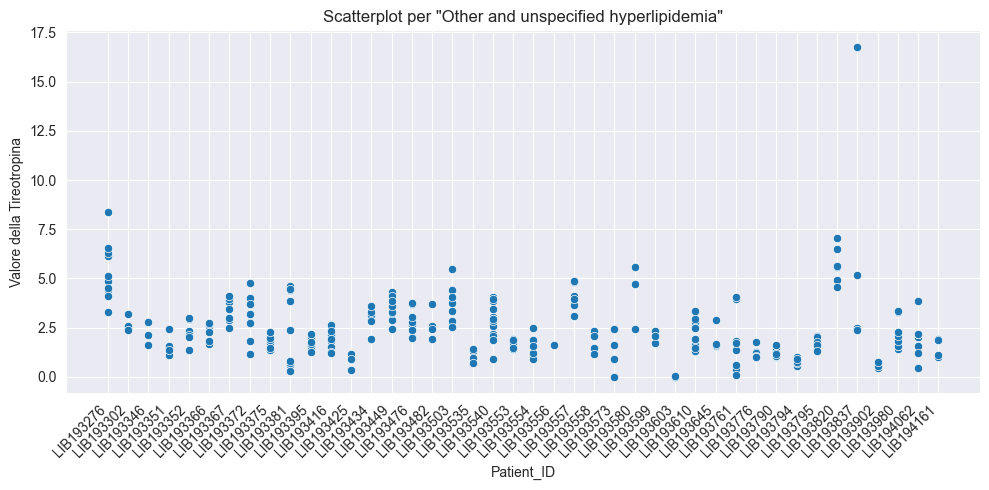

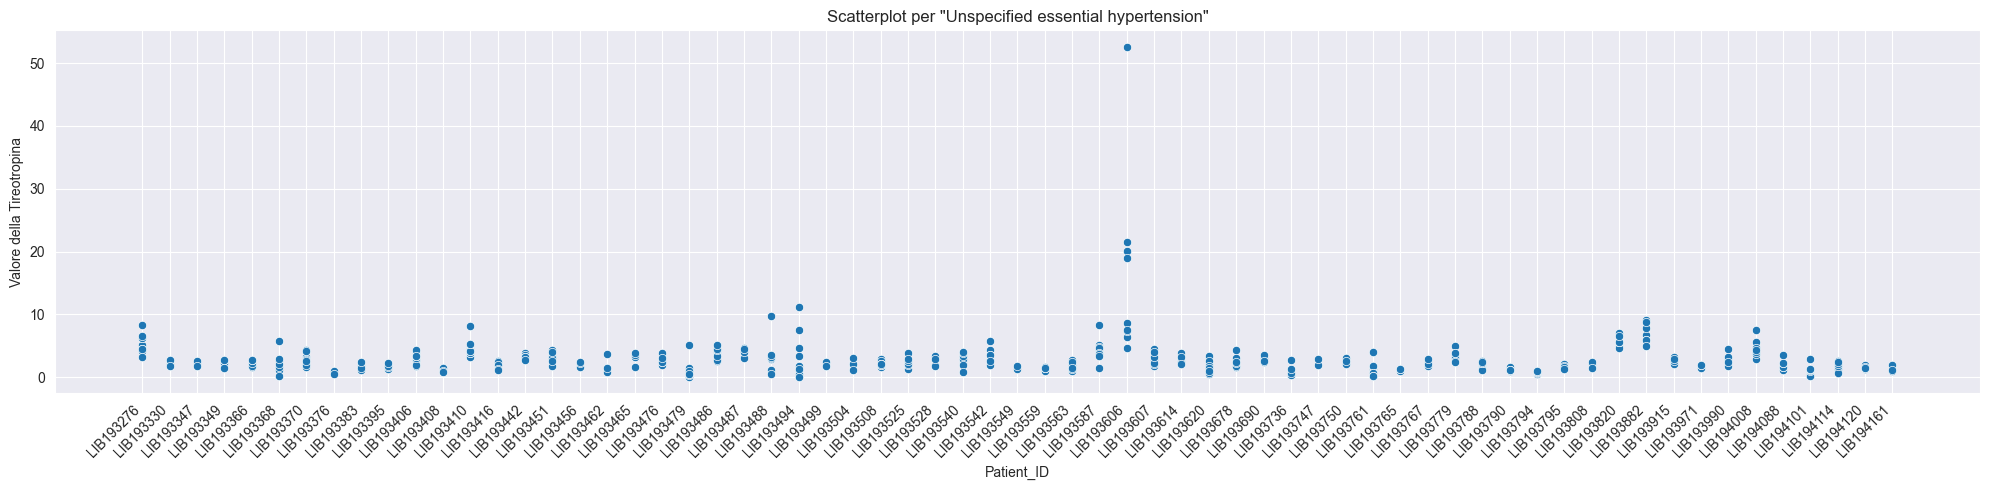

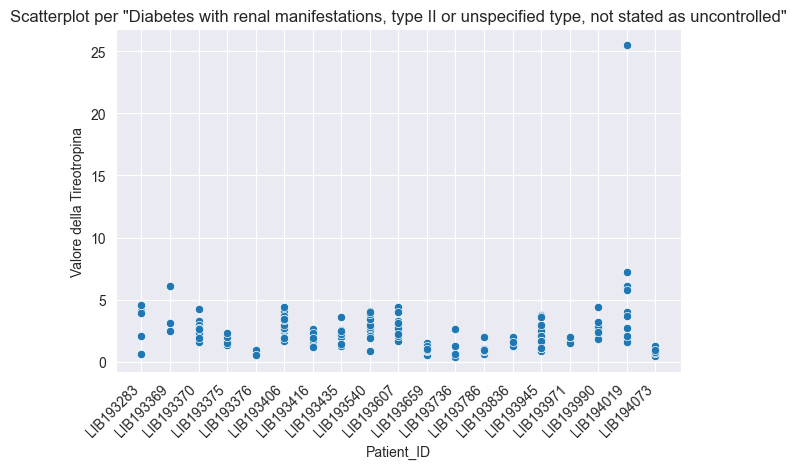

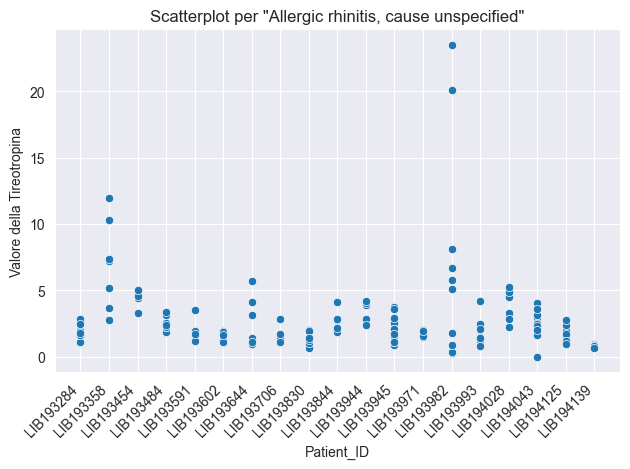

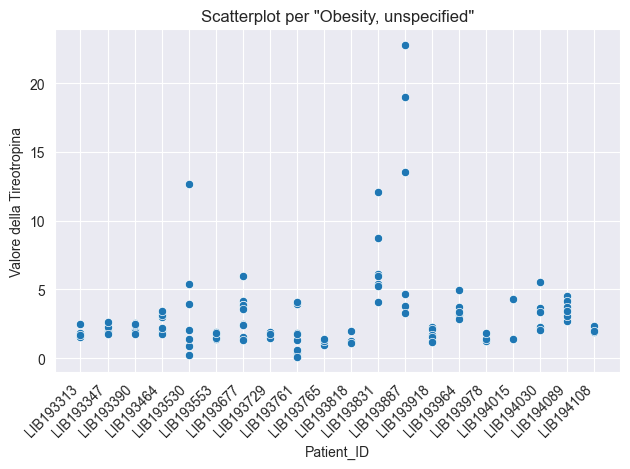

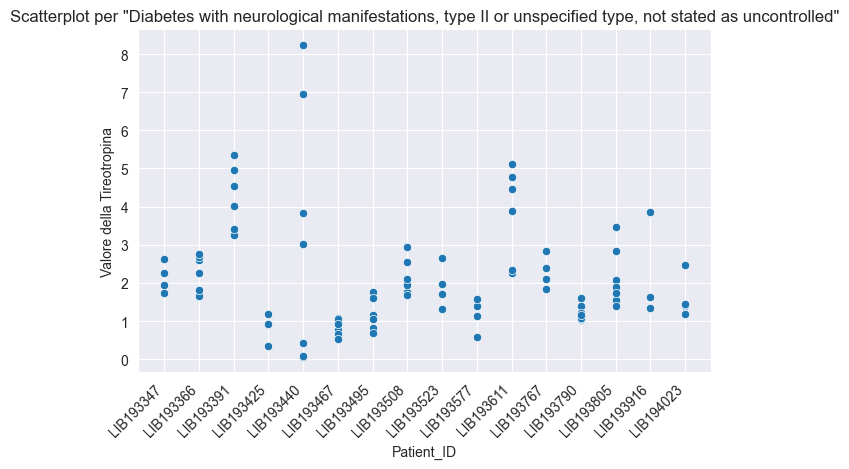

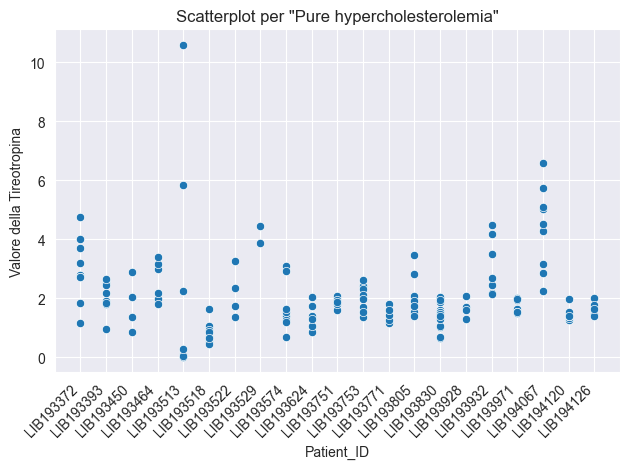

In [5]:
for description in TSH_diagnostic['Description'].unique():
    subset = TSH_diagnostic[TSH_diagnostic['Description'] == description]
    unique_patients = subset['Patient_ID'].nunique()

    if unique_patients >= 16:
        if 60 > unique_patients >= 30:
            plt.figure(figsize=(10, 5))
        elif unique_patients >= 60:
            plt.figure(figsize=(20, 5))
        else:
            plt.figure()
        sns.scatterplot(x='Patient_ID', y='Value', data=subset)
        plt.title(f'Scatterplot per \"{description}\"')
        plt.xlabel('Patient_ID')
        plt.ylabel('Valore della Tireotropina')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

#### Creatinine (urine)

In [ ]:
CreatinineUrine_subset = Biochemical[(Biochemical['Name'] == 'Creatinine (urine)')].copy()
CreatinineUrine_subset.drop(['Name'], axis=1, inplace=True)
CreatinineUrine_subset.describe()

In [ ]:
CreatinineUrine_diagnostic = pd.merge(CreatinineUrine_subset, Diagnostics, on='Patient_ID').copy()
CreatinineUrine_diagnostic.drop(['Code'], axis=1, inplace=True)
CreatinineUrine_diagnostic

In [ ]:
for description in CreatinineUrine_diagnostic['Description'].unique():
    subset = CreatinineUrine_diagnostic[CreatinineUrine_diagnostic['Description'] == description]
    unique_patients = subset['Patient_ID'].nunique()

    if unique_patients >= 16:
        if 60 > unique_patients >= 30:
            plt.figure(figsize=(10, 5))
        elif unique_patients >= 60:
            plt.figure(figsize=(20, 5))
        else:
            plt.figure()
        sns.scatterplot(x='Patient_ID', y='Value', data=subset)
        plt.title(f'Scatterplot per \"{description}\"')
        plt.xlabel('Patient_ID')
        plt.ylabel('Valore della Creatinina dalle urine')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

#### Albumin (urine)

In [ ]:
Albumin_subset = Biochemical[(Biochemical['Name'] == 'Albumin (urine)')].copy()
Albumin_subset.drop(['Name'], axis=1, inplace=True)
Albumin_subset.describe()

In [ ]:
Albumin_diagnostic = pd.merge(Albumin_subset, Diagnostics, on='Patient_ID').copy()
Albumin_diagnostic.drop(['Code'], axis=1, inplace=True)
Albumin_diagnostic

In [ ]:
for description in Albumin_diagnostic['Description'].unique():
    subset = Albumin_diagnostic[Albumin_diagnostic['Description'] == description]
    unique_patients = subset['Patient_ID'].nunique()

    if unique_patients >= 16:
        if 60 > unique_patients >= 30:
            plt.figure(figsize=(10, 5))
        elif unique_patients >= 60:
            plt.figure(figsize=(20, 5))
        else:
            plt.figure()
        sns.scatterplot(x='Patient_ID', y='Value', data=subset)
        plt.title(f'Scatterplot per \"{description}\"')
        plt.xlabel('Patient_ID')
        plt.ylabel('Valore della Albumina dalle urine')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

#### Chlorine

In [ ]:
Chlorine_subset = Biochemical[(Biochemical['Name'] == 'Chlorine')].copy()
Chlorine_subset.drop(['Name'], axis=1, inplace=True)
Chlorine_subset.describe()

In [ ]:
Chlorine_diagnostic = pd.merge(Chlorine_subset, Diagnostics, on='Patient_ID').copy()
Chlorine_diagnostic.drop(['Code'], axis=1, inplace=True)
Chlorine_diagnostic

In [ ]:
for description in Chlorine_diagnostic['Description'].unique():
    subset = Chlorine_diagnostic[Chlorine_diagnostic['Description'] == description]
    unique_patients = subset['Patient_ID'].nunique()

    if unique_patients >= 16:
        if 60 > unique_patients >= 30:
            plt.figure(figsize=(10, 5))
        elif unique_patients >= 60:
            plt.figure(figsize=(20, 5))
        else:
            plt.figure()
        sns.scatterplot(x='Patient_ID', y='Value', data=subset)
        plt.title(f'Scatterplot per \"{description}\"')
        plt.xlabel('Patient_ID')
        plt.ylabel('Valore della Clorina')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

#### IA2 ANTIBODIES

In [ ]:
IA2_subset = Biochemical[(Biochemical['Name'] == 'IA2 ANTIBODIES')].copy()
IA2_subset.drop(['Name'], axis=1, inplace=True)
IA2_subset.describe()

In [ ]:
IA2_diagnostic = pd.merge(IA2_subset, Diagnostics, on='Patient_ID').copy()
IA2_diagnostic.drop(['Code'], axis=1, inplace=True)
IA2_diagnostic

In [ ]:
for description in IA2_diagnostic['Description'].unique():
    subset = IA2_diagnostic[IA2_diagnostic['Description'] == description]
    unique_patients = subset['Patient_ID'].nunique()

    if unique_patients >= 16:
        if 60 > unique_patients >= 30:
            plt.figure(figsize=(10, 5))
        elif unique_patients >= 60:
            plt.figure(figsize=(20, 5))
        else:
            plt.figure()
        sns.scatterplot(x='Patient_ID', y='Value', data=subset)
        plt.title(f'Scatterplot per \"{description}\"')
        plt.xlabel('Patient_ID')
        plt.ylabel('Valore degli Anticorpi anti-tirosinchinasi (IA2)')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

non esistono grafici con almeno 16 persone che abbiano fatto analisi per questo parametro biochimico

#### Insulin

In [ ]:
Insulin_subset = Biochemical[(Biochemical['Name'] == 'Insulin')].copy()
Insulin_subset.drop(['Name'], axis=1, inplace=True)
Insulin_subset.describe()

In [ ]:
Insulin_diagnostic = pd.merge(Insulin_subset, Diagnostics, on='Patient_ID').copy()
Insulin_diagnostic.drop(['Code'], axis=1, inplace=True)
Insulin_diagnostic

In [ ]:
for description in Insulin_diagnostic['Description'].unique():
    subset = Insulin_diagnostic[Insulin_diagnostic['Description'] == description]
    unique_patients = subset['Patient_ID'].nunique()

    if unique_patients >= 16:
        if 60 > unique_patients >= 30:
            plt.figure(figsize=(10, 5))
        elif unique_patients >= 60:
            plt.figure(figsize=(20, 5))
        else:
            plt.figure()
        sns.scatterplot(x='Patient_ID', y='Value', data=subset)
        plt.title(f'Scatterplot per \"{description}\"')
        plt.xlabel('Patient_ID')
        plt.ylabel('Valore degli Anticorpi anti-tirosinchinasi (IA2)')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

non esistono grafici con almeno 16 persone che abbiano fatto analisi per questo parametro biochimico

## Glucouse Measurements

In [ ]:
Glucose

In [ ]:
Glucose.info()
Glucose.describe()

In [ ]:
Glucose.describe(include=['O'])

In [ ]:
nan_mask = Glucose.isna()
nan_count = nan_mask.sum()

nan_count